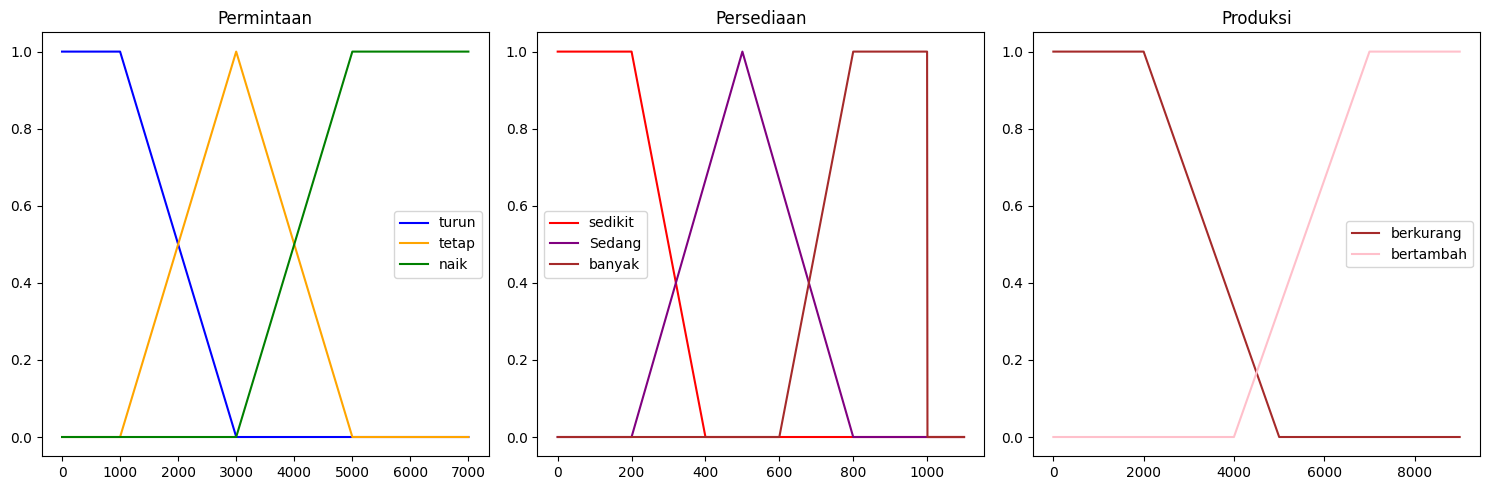

Hasil produksi untuk permintaan 2500 dan persediaan 300 adalah 6125.0


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Fuzzifikasi untuk permintaan
x_permintaan = np.arange(0, 7001, 1)
permintaan_turun = fuzz.trapmf(x_permintaan, [0, 0, 1000, 3000])
permintaan_tetap = fuzz.trimf(x_permintaan, [1000, 3000, 5000])
permintaan_naik = fuzz.trapmf(x_permintaan, [3000, 5000, 7000, 7000])

# Fuzzifikasi untuk persediaan
x_persediaan = np.arange(0, 1101, 1)
persediaan_sedikit = fuzz.trapmf(x_persediaan, [0, 0, 200, 400])
persediaan_sedang = fuzz.trimf(x_persediaan, [200, 500, 800])
persediaan_banyak = fuzz.trapmf(x_persediaan, [600, 800, 1000, 1000])

# Fuzzifikasi untuk produksi
x_produksi = np.arange(0, 9001, 1)
produksi_berkurang = fuzz.trapmf(x_produksi, [0, 0, 2000, 5000])
produksi_bertambah = fuzz.trapmf(x_produksi, [4000, 7000, 9000, 9000])

# Plot keanggotaan
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(x_permintaan, permintaan_turun, 'b', label='turun')
axs[0].plot(x_permintaan, permintaan_tetap, 'orange', label='tetap')
axs[0].plot(x_permintaan, permintaan_naik, 'g', label='naik')
axs[0].set_title('Permintaan')
axs[0].legend()

axs[1].plot(x_persediaan, persediaan_sedikit, 'r', label='sedikit')
axs[1].plot(x_persediaan, persediaan_sedang, 'purple', label='Sedang')
axs[1].plot(x_persediaan, persediaan_banyak, 'brown', label='banyak')
axs[1].set_title('Persediaan')
axs[1].legend()

axs[2].plot(x_produksi, produksi_berkurang, 'brown', label='berkurang')
axs[2].plot(x_produksi, produksi_bertambah, 'pink', label='bertambah')
axs[2].set_title('Produksi')
axs[2].legend()

plt.tight_layout()
plt.show()

# Fungsi inferensi dan defuzzifikasi
def tsukamoto(permintaan, persediaan):
    # Fuzzifikasi input
    perm_turun = fuzz.interp_membership(x_permintaan, permintaan_turun, permintaan)
    perm_tetap = fuzz.interp_membership(x_permintaan, permintaan_tetap, permintaan)
    perm_naik = fuzz.interp_membership(x_permintaan, permintaan_naik, permintaan)

    pers_sedikit = fuzz.interp_membership(x_persediaan, persediaan_sedikit, persediaan)
    pers_sedang = fuzz.interp_membership(x_persediaan, persediaan_sedang, persediaan)
    pers_banyak = fuzz.interp_membership(x_persediaan, persediaan_banyak, persediaan)

    # Aturan fuzzy
    # Jika Permintaan Turun dan Persediaan Sedikit maka Produksi Bertambah
    r1 = np.fmin(perm_turun, pers_sedikit)
    z1 = 7000 * r1

    # Jika Permintaan Turun dan Persediaan Sedang maka Produksi Berkurang
    r2 = np.fmin(perm_turun, pers_sedang)
    z2 = 3000 * r2

    # Jika Permintaan Turun dan Persediaan Banyak maka Produksi Berkurang
    r3 = np.fmin(perm_turun, pers_banyak)
    z3 = 2000 * r3

    # Jika Permintaan Tetap dan Persediaan Sedikit maka Produksi Bertambah
    r4 = np.fmin(perm_tetap, pers_sedikit)
    z4 = 8000 * r4

    # Jika Permintaan Tetap dan Persediaan Sedang maka Produksi Berkurang
    r5 = np.fmin(perm_tetap, pers_sedang)
    z5 = 5000 * r5

    # Jika Permintaan Tetap dan Persediaan Banyak maka Produksi Berkurang
    r6 = np.fmin(perm_tetap, pers_banyak)
    z6 = 3000 * r6

    # Jika Permintaan Naik dan Persediaan Sedikit maka Produksi Bertambah
    r7 = np.fmin(perm_naik, pers_sedikit)
    z7 = 9000 * r7

    # Jika Permintaan Naik dan Persediaan Sedang maka Produksi Bertambah
    r8 = np.fmin(perm_naik, pers_sedang)
    z8 = 8000 * r8

    # Jika Permintaan Naik dan Persediaan Banyak maka Produksi Berkurang
    r9 = np.fmin(perm_naik, pers_banyak)
    z9 = 4000 * r9

    # Hitung output berdasarkan rata-rata berbobot
    numerator = (z1 + z2 + z3 + z4 + z5 + z6 + z7 + z8 + z9)
    denominator = (r1 + r2 + r3 + r4 + r5 + r6 + r7 + r8 + r9)

    if denominator == 0:
        return 0  # Mencegah pembagian dengan nol
    return numerator / denominator

# Contoh perhitungan
permintaan = 2500
persediaan = 300
hasil_produksi = tsukamoto(permintaan, persediaan)
print(f"Hasil produksi untuk permintaan {permintaan} dan persediaan {persediaan} adalah {hasil_produksi}")
